In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(10,10)})

In [3]:
c = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/teams_colors_logos.csv',
               sep=',')

In [4]:
cc = c[['team_abbr', 'team_color']]

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/data/play_by_play_2020.csv.gz')

In [6]:
epa_rain =\
df[(df.weather.str.contains('Rain|showers')) &
  (df.play_type == 'pass')].groupby('posteam').epa.mean()\
.sort_values(ascending=False).reset_index()

In [7]:
epa_rain = pd.merge(epa_rain, cc, left_on='posteam', right_on='team_abbr')

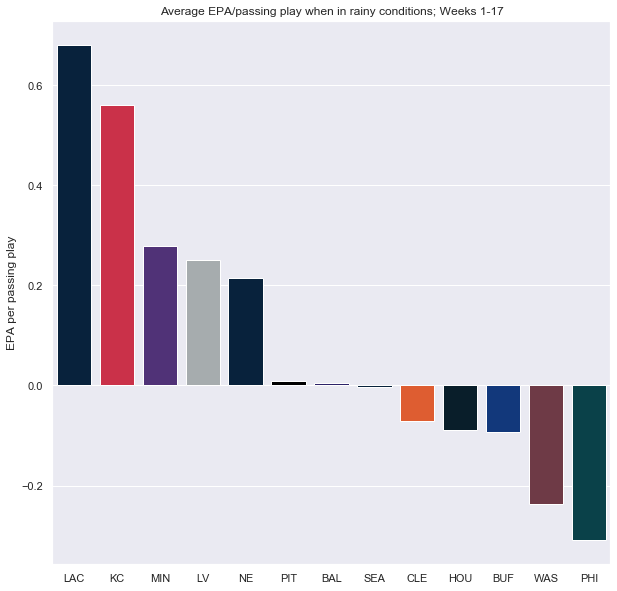

In [8]:
fig = sns.barplot(x='posteam', y='epa', data=epa_rain, 
            palette=epa_rain.team_color)\
.set_title('Average EPA/passing play when in rainy conditions; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("EPA per passing play")
plt.show(fig);

In [9]:
epa_rain_play_count =\
df[(df.weather.str.contains('Rain|showers')) &
  (df.play_type == 'pass')].groupby('posteam').play_id.count()\
.sort_values(ascending=False).reset_index()

In [10]:
epa_rain_play_count = pd.merge(epa_rain_play_count, cc, left_on='posteam', right_on='team_abbr')

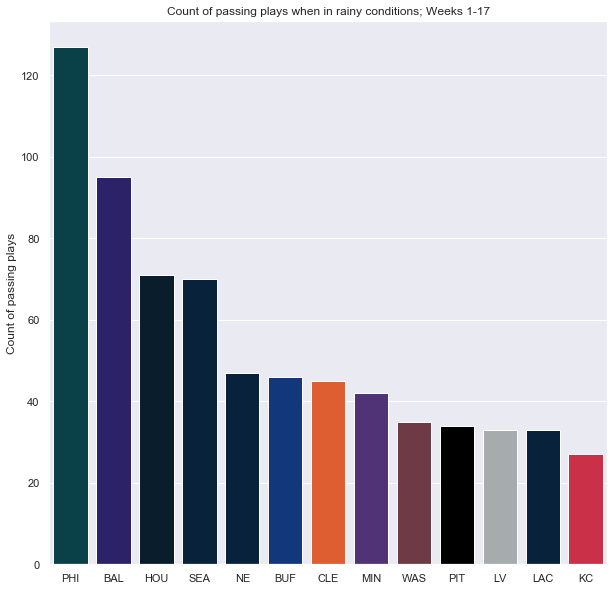

In [11]:
fig = sns.barplot(x='posteam', y='play_id', data=epa_rain_play_count, 
            palette=epa_rain_play_count.team_color)\
.set_title('Count of passing plays when in rainy conditions; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("Count of passing plays")
plt.show(fig);

In [12]:
t = df[(df.play_type == 'pass') 
       & (df.ydstogo.between(10, 20))
       & (df.down.isin([3.0, 4.0]))
       & (df.wp >= .1)].groupby('posteam').agg({
    'epa': ['mean', 'count']
})\
.sort_values(by=('epa', 'mean'), ascending=False)\
.reset_index()

In [13]:
late = t.sort_values(by=(('epa', 'mean')), ascending=False).head(10)

In [14]:
late = pd.merge(late, c, left_on='posteam', right_on='team_abbr')

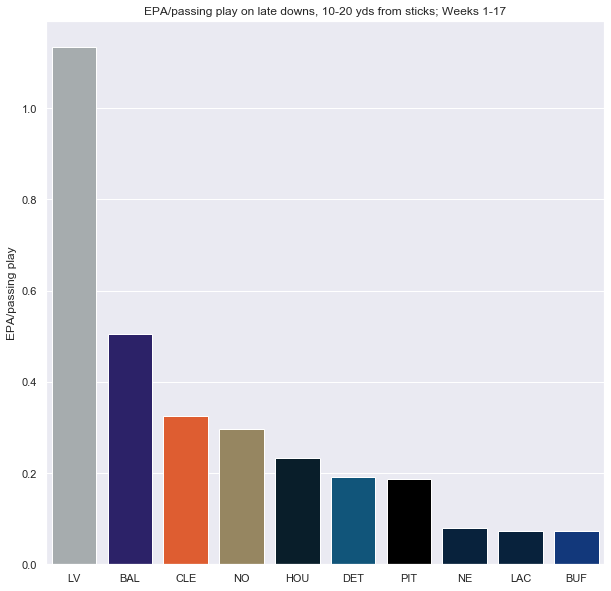

In [15]:
fig = sns.barplot(x=('posteam', ''), y=('epa', 'mean'), data=late, 
            palette=late.team_color)\
.set_title('EPA/passing play on late downs, 10-20 yds from sticks; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("EPA/passing play")
plt.show(fig);

In [16]:
df['mph'] = df.weather.str.extract('([0-9]+ mph)')

In [17]:
df['mph'] = df.mph.str.split(expand=True)[0]

In [18]:
df['mph'] = df.mph.astype('float')

In [19]:
mph = df[(df.mph >= 20)
        & (df.play_type == 'pass')].groupby('posteam').agg({
    'epa': ['mean', 'count']
})\
.sort_values(by=('epa', 'mean'), ascending=False)\
.reset_index()

In [20]:
mph = pd.merge(mph, cc, left_on='posteam', right_on='team_abbr')

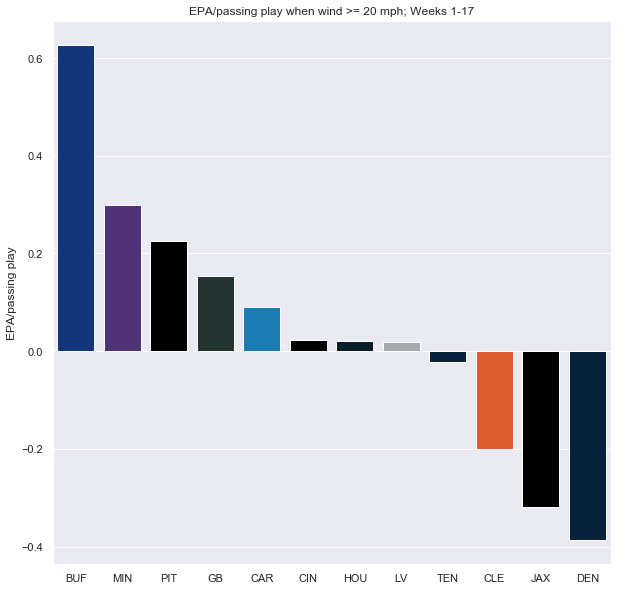

In [21]:
fig = sns.barplot(x=('posteam', ''), y=('epa', 'mean'), data=mph, 
            palette=mph.team_color)\
.set_title('EPA/passing play when wind >= 20 mph; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("EPA/passing play")
plt.show(fig);

In [22]:
df['temp'] = df.weather.str.extract('(Temp: [0-9]+)')

In [23]:
df['temp'] = df.temp.str.split(' ', expand=True)[1].astype('float')

In [24]:
df['humidity'] = df.weather.str.extract('(Humidity: [0-9]+)')
df['humidity'] = df.humidity.str.split(' ', expand=True)[1].astype('float')

In [25]:
s = df[df.play_type == 'pass']\
.groupby('posteam').success.mean().sort_values(ascending=False).reset_index().head(10)

In [26]:
s = pd.merge(s, cc, left_on='posteam', right_on='team_abbr')

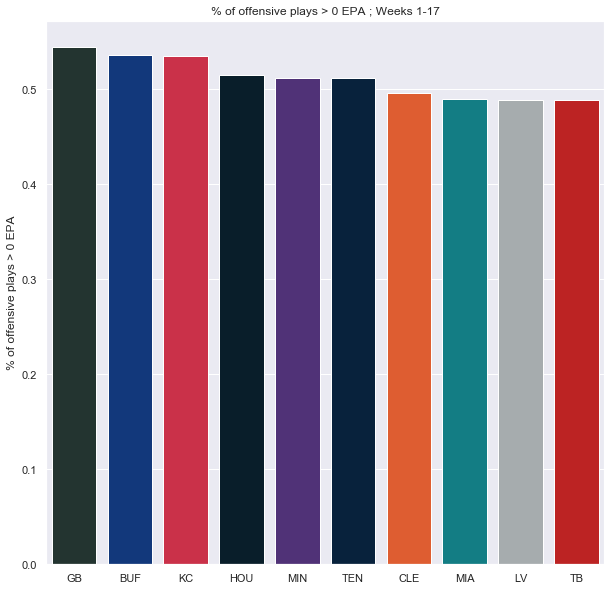

In [27]:
#plt.figure(figsize=(6,4))
fig = sns.barplot(x='posteam', y='success', data=s, 
            palette=s.team_color)\
.set_title('% of offensive plays > 0 EPA ; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("% of offensive plays > 0 EPA")
plt.show(fig);

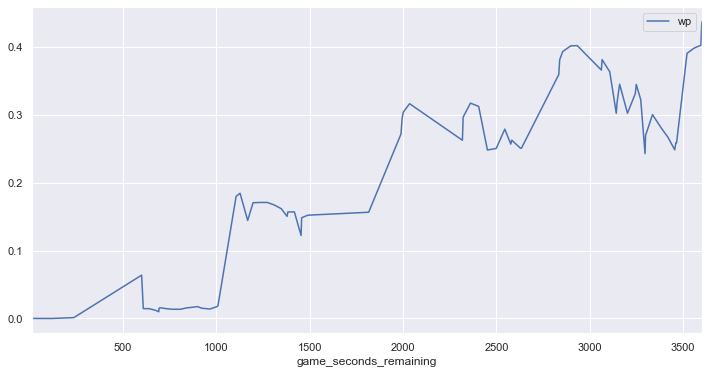

In [28]:
df[
(df.posteam == 'BUF')
& (df.week == 5)].groupby('game_seconds_remaining').wp.mean().reset_index()\
.sort_values(by='game_seconds_remaining').plot(x='game_seconds_remaining', y='wp', figsize=(12, 6));

In [29]:
third = df[
(df.down == 3)
& (df.ydstogo >=10)
& (df.wp <= 0.90)
& (df.play_type == 'pass')].groupby('posteam').agg({
    'third_down_converted': ['mean', 'count']
}).sort_values(by=('third_down_converted', 'mean'), ascending=False).round(3).reset_index().head(10)

In [30]:
third = pd.merge(third, cc, left_on='posteam', right_on='team_abbr')

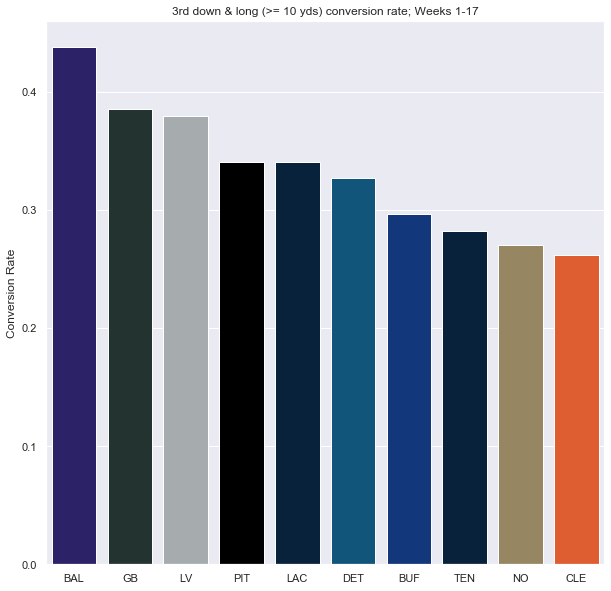

In [31]:
fig = sns.barplot(x='team_abbr', y=('third_down_converted', 'mean'), data=third, 
            palette=third.team_color)\
.set_title('3rd down & long (>= 10 yds) conversion rate; Weeks 1-17')
plt.xlabel(None)
plt.ylabel("Conversion Rate")
plt.show(fig);

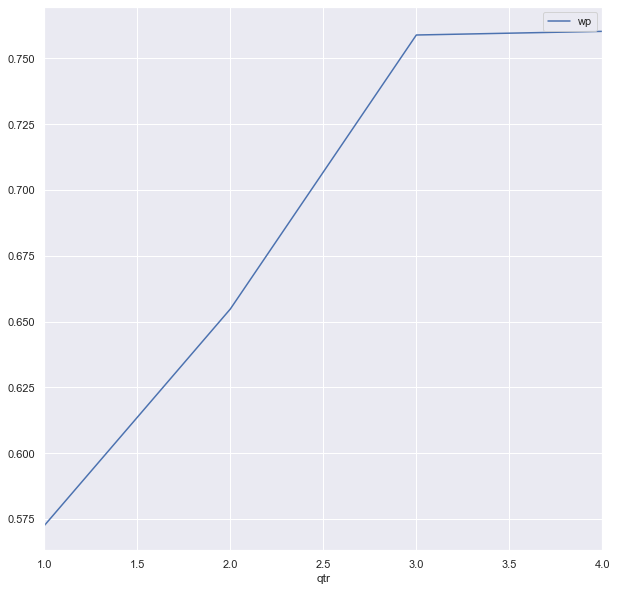

In [32]:
df[
    (df.posteam == 'BUF')
].groupby(df.qtr).wp.mean().reset_index().plot(x='qtr', y='wp')

In [33]:
epass = df[
(df.down.isin([1, 2]))
& (df.wp.between(0.10, 0.90))
& (df.half_seconds_remaining > 120)
& (df.play_type == 'pass')].groupby('posteam').agg({
    'epa': ['mean', 'count']
}).sort_values(by=('epa', 'mean'), ascending=False).round(3).reset_index().head(10)

In [34]:
epass = pd.merge(epass, cc, left_on='posteam', right_on='team_abbr')

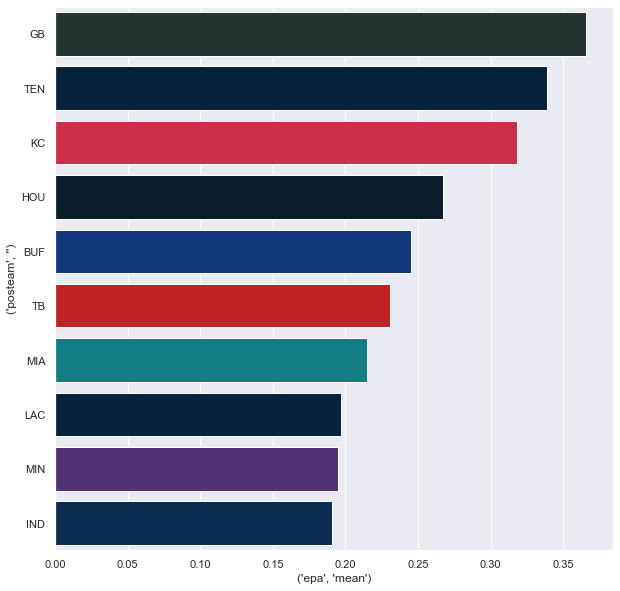

In [35]:
sns.barplot(x=('epa', 'mean'), y=('posteam',''), data=epass, palette=epass.team_color);

In [36]:
# defenses that defend early down passes (1&2 down), WP between 20 & 80 %, omit last 2 mins of halves
edp = df[
    (df.down.isin([1, 2]))
    &(df.play_type.isin(['pass', 'run']))
    & (df.half_seconds_remaining > 120)
    & (df.def_wp.between(0.2, 0.8))
    & (df.week.between(1, 17))
]\
.groupby('defteam').play_type.value_counts().unstack()

In [37]:
edp['early_d_pass'] = (edp['pass'] / (edp['pass'] + edp['run'])).round(3)

In [38]:
edp = edp.sort_values(by='early_d_pass').reset_index()

In [39]:
edp = pd.merge(edp, cc, left_on='defteam', right_on='team_abbr')

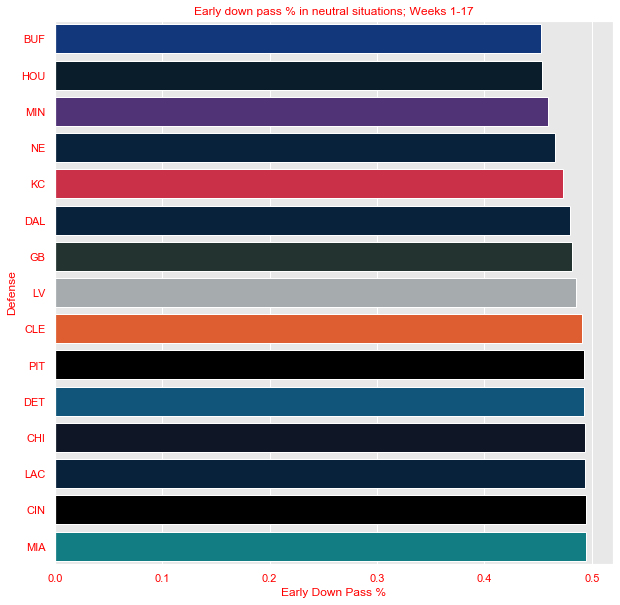

In [40]:
ax = sns.barplot(x='early_d_pass', y='defteam', data=edp.head(15), palette=edp.team_color)
ax.set_title('Early down pass % in neutral situations; Weeks 1-17', color='red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.patch.set_facecolor('#E8E8E8')
plt.ylabel("Defense")
plt.xlabel("Early Down Pass %");

In [41]:
# offensive early down passes (1&2 down), WP between 20 & 80 %, omit last 2 mins of halves
off = df[
    (df.down.isin([1, 2]))
    &(df.play_type.isin(['pass', 'run']))
    & (df.half_seconds_remaining > 120)
    & (df.wp.between(0.2, 0.8))
    & (df.week.between(1, 17))
]\
.groupby('posteam').play_type.value_counts().unstack()

off['early_d_pass'] = (off['pass'] / (off['pass'] + off['run'])).round(3)

In [42]:
off = off.sort_values(by='early_d_pass', ascending=False).reset_index()

In [43]:
off = pd.merge(off, cc, left_on='posteam', right_on='team_abbr')

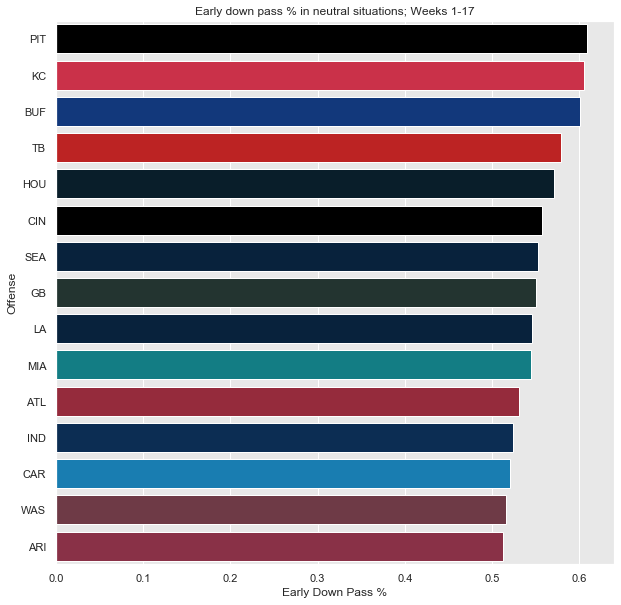

In [44]:
ax = sns.barplot(x='early_d_pass', y='posteam', data=off.head(15), palette=off.team_color)
ax.set_title('Early down pass % in neutral situations; Weeks 1-17')
ax.patch.set_facecolor('#E8E8E8')
plt.ylabel("Offense")
plt.xlabel("Early Down Pass %");

In [45]:
# do a study on epa/play for early down pass % compared to early down run %. Netural situations.

In [46]:
ede = df[
    (df.down.isin([1, 2]))
    &(df.play_type.isin(['pass', 'run']))
    & (df.half_seconds_remaining > 120)
    & (df.wp.between(0.2, 0.8))
    & (df.week.between(1, 17))
]\
.groupby(['posteam', 'play_type']).agg({
    'epa': ['mean', 'count']
}).reset_index().pivot_table(index='posteam', columns='play_type')

In [47]:
ede.columns = ['pass', 'run', 'pass_epa', 'run_epa']

In [48]:
ede = ede.reset_index()